170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 13s 0us/step


<ipython-input-1-c04b51c9bcbc>:22: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  plt.title(class_names[int(y_train[i])])


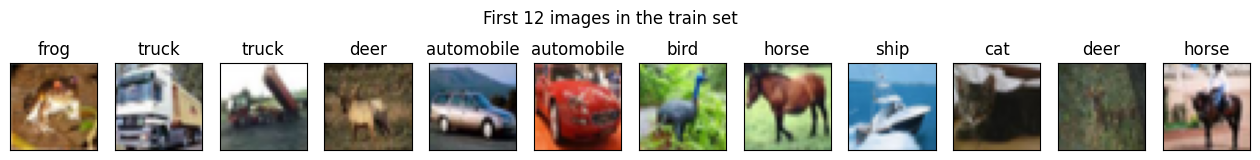

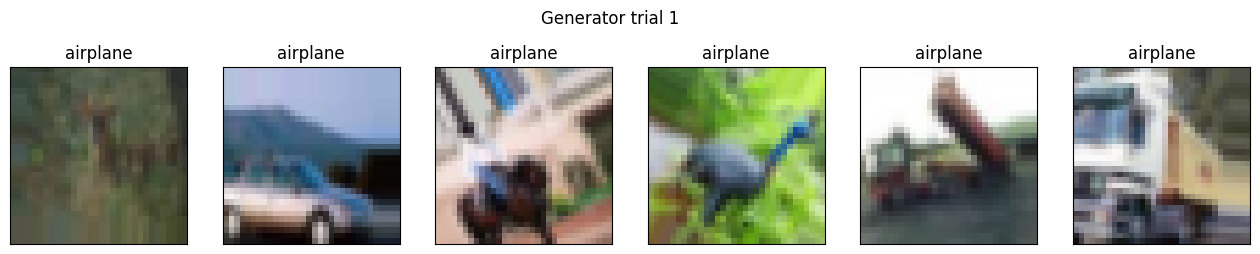

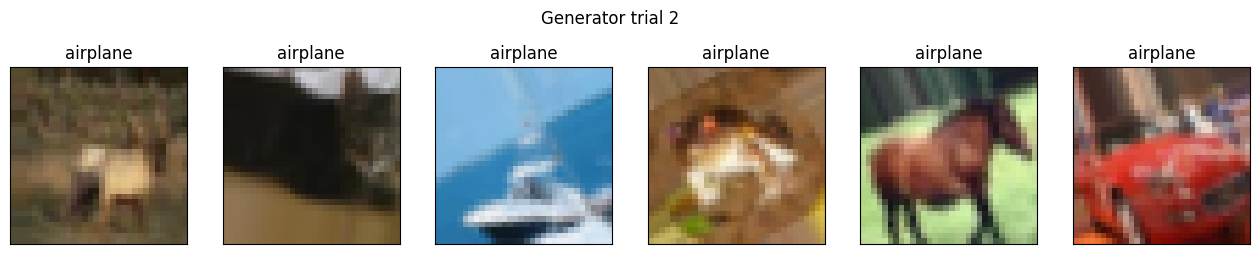

In [1]:
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np

# CIFAR-10의 부류 이름
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# CIFAR-10 데이터셋을 읽고 신경망에 입력할 형태로 변환
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train = x_train.astype('float32') / 255.0
x_train = x_train[0:12]  # 앞 12개에 대해서만 증대 적용
y_train = y_train[0:12]   # 앞 12개 레이블

# 앞 12개 영상을 그려줌
plt.figure(figsize=(16, 2))
plt.suptitle("First 12 images in the train set")
for i in range(12):
    plt.subplot(1, 12, i + 1)
    plt.imshow(x_train[i])
    plt.xticks([]); plt.yticks([])
    plt.title(class_names[int(y_train[i])])

# 영상 증대기 생성
batch_size = 6  # 한 번에 생성하는 양
generator = ImageDataGenerator(rotation_range=30.0,
                               width_shift_range=0.2,
                               height_shift_range=0.2,
                               horizontal_flip=True)
gen = generator.flow(x_train, y_train, batch_size=batch_size)

# 첫 번째 증대하고 그리기
img, label = next(gen)
plt.figure(figsize=(16, 3))
plt.suptitle("Generator trial 1")
for i in range(batch_size):
    plt.subplot(1, batch_size, i + 1)
    plt.imshow(img[i])
    plt.xticks([]); plt.yticks([])
    plt.title(class_names[np.argmax(label[i])])  # argmax를 사용하여 클래스 레이블을 결정

# 두 번째 증대하고 그리기
img, label = next(gen)
plt.figure(figsize=(16, 3))
plt.suptitle("Generator trial 2")
for i in range(batch_size):
    plt.subplot(1, batch_size, i + 1)
    plt.imshow(img[i])
    plt.xticks([]); plt.yticks([])
    plt.title(class_names[np.argmax(label[i])])  # argmax를 사용하여 클래스 레이블을 결정

plt.show()

